In [1]:
import os
from os.path import abspath, join

import matplotlib.pyplot as plt
import numpy as np
import pickle

from src.data.load_dataset import generate_frequency_detection, generate_frequency_XOR

In [72]:
data_dir = abspath(join(os.getcwd(), '../../'))

### Plot frequency detection results
The mean and standard deviation from 5 trials

<Figure size 432x288 with 0 Axes>

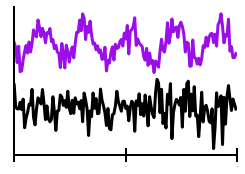

In [234]:
# plot the frequency detection task
num_samples, sampling_rate, freq, duration, snr = 5000, 1500, 5, 0.1, 0.8
X, y = generate_frequency_detection(num_samples, sampling_rate, freq, duration, snr, seed=20)
N = int(sampling_rate * duration)
t = np.arange(N) / sampling_rate * 1000

fig = plt.figure()
fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(211)
plt.plot(t, X[y == 1][0], c='#9a0eea', lw=3, alpha=1, label='$\omega_1=$%d Hz' % freq)
plt.plot(t, X[y == 0][0] - 5, c='#000000', lw=3, alpha=1,label=r'white noise')

# format ticks
ax.tick_params(axis = 'both', which = 'major', direction='inout', labelsize = 0, width=2, length=14)
ax.tick_params(axis = 'both', which = 'minor', direction='inout', labelsize = 0, width=0, length=0)
plt.xticks(np.arange(0, 150, 50))
plt.yticks([])
plt.xlim(0, 100)

# format axes
for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(2)
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_detection_task.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)

halteres, (281, 0.0000)
classical, (281, 1.9636)
mistuned, (281, 19.8545)


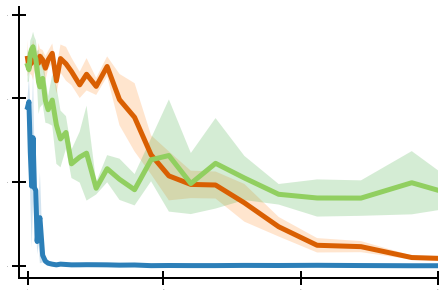

In [233]:
# plot the frequency detection results
n_features = sorted(set(np.logspace(0, 3, 50).astype('int')))
models = ['halteres', 'classical', 'mistuned']
labels = {'halteres': 'sensilla-inspired', 'classical': 'classical', 'mistuned': 'mistuned'} 

# load with good params
with open(data_dir + '/models/results/freq_detection/freq_clf.pickle', 'rb') as handle:
    results = pickle.load(handle) 

# load results with bad params
with open(data_dir + '/models/results/freq_detection/freq_detection_mistuned.pickle', 'rb') as handle:
    results_mistuned = pickle.load(handle)
    
results['mistuned'] = results_mistuned['halteres']
colors = {'halteres': '#2c7fb8', 'classical': '#d95f02', 'mistuned': '#91cf60'}

fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = results[m]['avg_test_err']
    std_test_err = results[m]['std_test_err']
    plt.plot(n_features, avg_test_err, label=labels[m], lw=5, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (m, n_features[32], avg_test_err[32] * 100))
    
# format axes
for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(2)
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
    
# format ticks
ax.tick_params(axis = 'both', which = 'major', direction='inout', labelsize = 0, width=2, length=14)

# axes limits and ticks
plt.xlim([-5, 300])
plt.yticks(np.arange(0, 0.65, 0.2))
plt.ylim([-0.03, 0.62])
plt.xticks([1, 100, 200, 300])
# plt.legend(loc = 'upper right', fontsize=30)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_detection_results.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)

### Plot frequency XOR results
The mean and std deviation from 5 trials

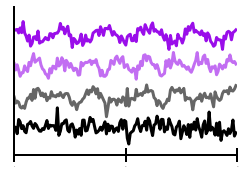

In [253]:
# plot the frequency XOR task'
num_samples, sampling_rate, freq1, freq2, duration, snr = 5000, 1500, 5, 8, 0.1, 0.8
X, y = generate_frequency_XOR(num_samples, sampling_rate, freq1, freq2, duration, snr, seed=20, shuffle=False)
freqs = [int(freq1/ duration), int(freq2  / duration)]

fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(211)
plt.plot(t, X[0] + 5, c='#9a0eea', lw=3, alpha=1, label='$\omega_1=$%d Hz' % freqs[0])
plt.plot(t, X[1250], c='#9a0eea', lw=3, alpha=0.6, label=r'$\omega_2=$%d Hz' % freqs[1])
plt.plot(t, X[2501] - 5, c='#000000', lw=3, alpha=0.6, label=r'mixed $%d$ & $%d$ Hz' % (freqs[0], freqs[1]))
plt.plot(t, X[-1] - 10, c='#000000', lw=3, alpha=1, label='white noise')

# format ticks
ax.tick_params(axis = 'both', which = 'major', direction='inout', labelsize = 0, width=2, length=14)
ax.tick_params(axis = 'both', which = 'minor', direction='inout', labelsize = 0, width=0, length=0)
plt.xticks(np.arange(0, 150, 50))
plt.yticks([])
plt.xlim(0, 100)
plt.ylim(-14.5,9.5)

# format axes
for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(2)
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
    
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_XOR_task.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)

halteres, (281, 0.0400)
classical, (281, 1.2400)
mistuned, (281, 26.2133)


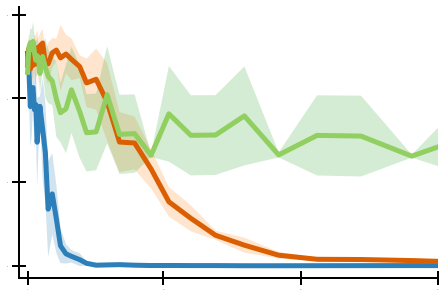

In [232]:
# plot the frequency detection results
n_features = sorted(set(np.logspace(0, 3, 50).astype('int')))
models = ['halteres', 'classical', 'mistuned']
labels = {'halteres': 'sensilla-inspired', 'classical': 'classical', 'mistuned': 'mistuned'} 

# load with good params
with open(data_dir + '/models/results/freq_XOR/freq_XOR.pickle', 'rb') as handle:
    results = pickle.load(handle) 

# load results with bad params
with open(data_dir + '/models/results/freq_XOR/freq_XOR_mistuned.pickle', 'rb') as handle:
    results_mistuned = pickle.load(handle)
    
results['mistuned'] = results_mistuned['halteres']
colors = {'halteres': '#2c7fb8', 'classical': '#d95f02', 'mistuned': '#91cf60'}

fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = results[m]['avg_test_err']
    std_test_err = results[m]['std_test_err']
    plt.plot(n_features, avg_test_err, label=labels[m], lw=5, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (m, n_features[32], avg_test_err[32] * 100))
    
# format axes
for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(2)
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
    
# format ticks
ax.tick_params(axis = 'both', which = 'major', direction='inout', labelsize = 0, width=2, length=14)

# axes limits and ticks
plt.xlim([-5, 300])
plt.yticks(np.arange(0, 0.65, 0.2))
plt.ylim([-0.03, 0.62])
plt.xticks([1, 100, 200, 300])
# plt.legend(loc = 'upper right', fontsize=30)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_XOR_results.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)

In [129]:
5 * 1.5

7.5